# Credit Card Fraud Detection 

## 1. Introduction
Credit card fraud detection is the science and art of detecting unusual activity in credit transactions. Fraud occurs when the credit card information of an individual is stolen and used to make unauthorized purchases and or withdrawals from the original holders account.


## 2. The Dataset
The dataset is from Kaggle [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).

### Dataset Description
**Description from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud)**
> The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

> It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## machine learning method 
In this project, I will implement different machine learning algrithom to predict the credit card frault ratio and also estimate useful features that are much more related to the credit card frault.

In [13]:
# import packages
print(__doc__)
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, auc

Automatically created module for IPython interactive environment


In [6]:
# load the data
df = pd.read_csv("creditcard.csv")

In [7]:
# get column names
colNames = df.columns.values
print(colNames)
print(df.head(2))
print(df.info())

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1     

In [11]:
# get dataframe dimensions
print ("Dimension of dataset:", df.shape)
print(df.describe())

Dimension of dataset: (284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    

In [12]:
# get class distribution
print ("Normal transaction:", dataframe['Class'][dataframe['Class'] == 0].count()) #class = 0
print ("Fraudulent transaction:", dataframe['Class'][dataframe['Class'] == 1].count())#class = 1

Normal transaction: 284315
Fraudulent transaction: 492


In [14]:
# separate classes into different datasets
class0 = dataframe.query('Class == 0')
class1 = dataframe.query('Class == 1')

# randomize the datasets
class0 = class0.sample(frac=1)
class1 = class1.sample(frac=1)

# the data is really unbalance, How can we solve this problem?
Undersampling to deal with class imbalance
The examples of the majority class, in this case the normal transactions drastically outnumber the incidences of fraud in our dataset. One of the strategies employed in the data science community is to delete instances from the over-represented class to improve the learning function. Here, we selected 6000 instances of the normal class from the original 284315 records.

In [15]:
# undersample majority class due to class imbalance before training - train
class0train = class0.iloc[0:6000]
class1train = class1

# combine subset of different classes into one balaced dataframe
train = class0train.append(class1train, ignore_index=True).values

In [16]:
# split data into X and y
X = train[:,0:30].astype(float)
Y = train[:,30]

# apply the gradient boosting algrithom
Gradient Boosting is also known as XGBoost. This model is preferred due to its execution speed and learning performance. 

In [29]:
# XGBoost CV model
modelTotal =[XGBClassifier(),AdaBoostClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]
model = modelTotal[0]
kfold = StratifiedKFold(n_splits=10, random_state=7)

# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring = scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 0.979 (0.009)


## 5. Plot the Result

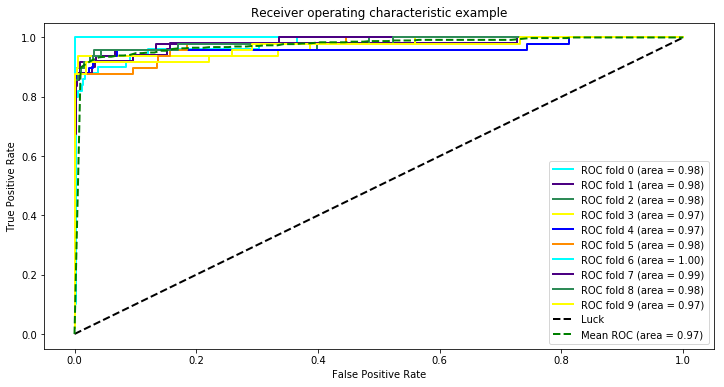

In [30]:
# plot roc-curve
# code adapted from http://scikit-learn.org
plt.figure(figsize = (12,6))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(kfold.split(X, Y), colors):
    probas_ = model.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= kfold.get_n_splits(X, Y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()